In [12]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# import powerlaw

In [13]:
path = '/work/lpsha/data/regime/'
cities = os.listdir(path)

real_degree_sequence = np.array([])
for city in tqdm(cities):
        real_degree_sequence=np.append(real_degree_sequence, np.loadtxt(path+city))

100%|████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 47.21it/s]


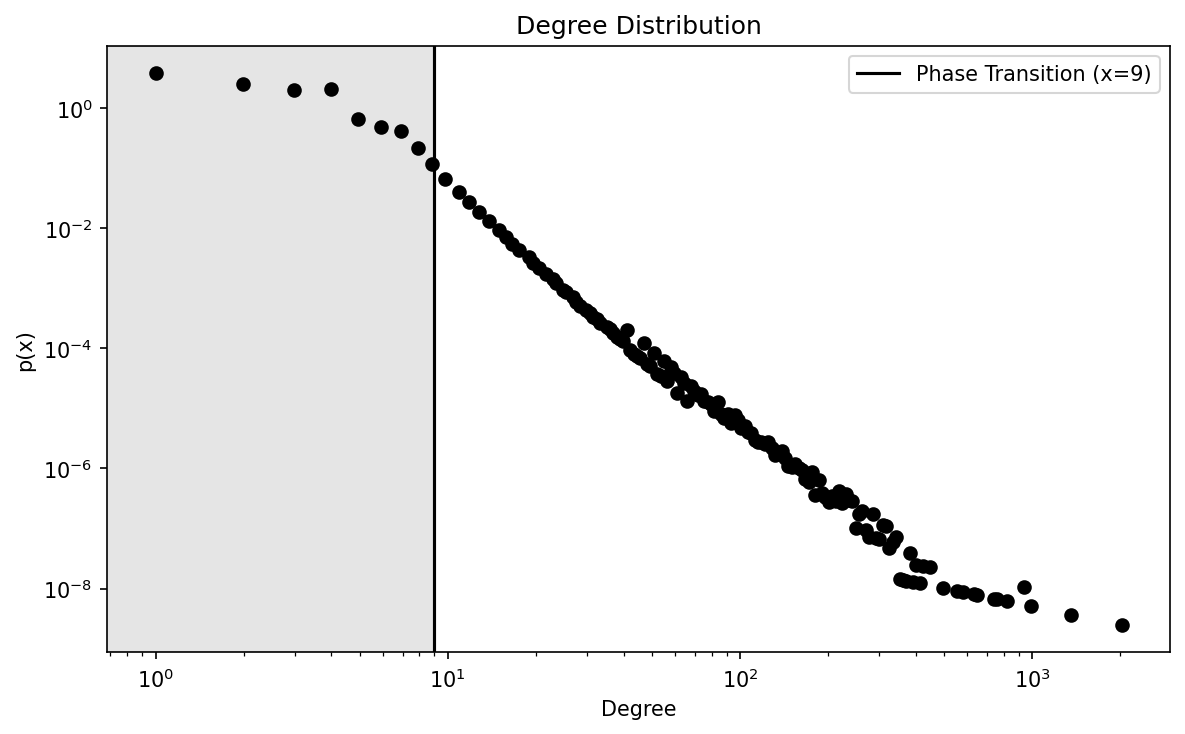

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

# Histogram data
# degree = df['merged_degree10'].values
y, x = np.histogram(real_degree_sequence, bins=np.logspace(0, np.log10(real_degree_sequence.max()), len(np.unique(real_degree_sequence))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.scatter(x_nn, y_nn, alpha=1, zorder=2, color='k', label='Street Network')

# Add vertical line at x=7
ax.axvline(9, color='k', label='Phase Transition (x=9)')

# Add gray background to the left of x=7
ax.axvspan(0, 9, color='gray', alpha=0.2, zorder=1, label='Phase Shift Region')

# Log-log scaling and labels
ax.set_ylabel('p(x)')
ax.set_xlabel('Degree')
ax.set_xscale('log')
ax.set_yscale('log')

# Add legend
legend_elements = [
    ax.lines[0],  # Use the axvline's line as the legend entry
]
ax.legend(handles=legend_elements, loc='upper right')

plt.title("Degree Distribution")
plt.tight_layout()
plt.show()


100%|████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 39.72it/s]


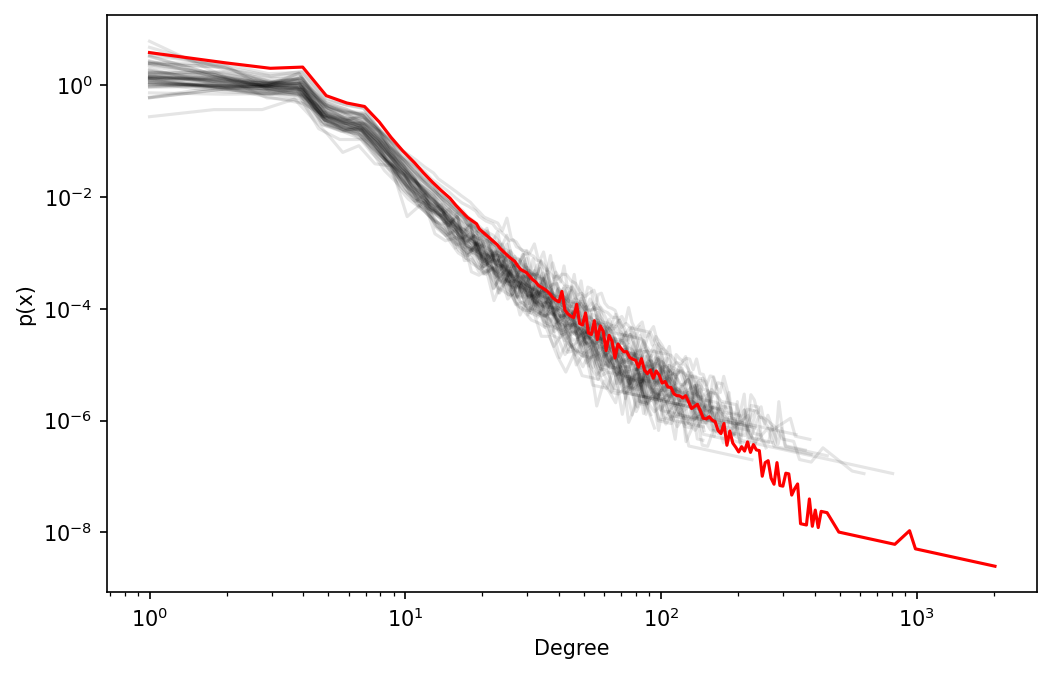

In [21]:
path = '/work/lpsha/data/regime/'

full = np.array([])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

cities = os.listdir(path)

for city in tqdm(cities):

    d=np.loadtxt(path+city)
    full=np.append(full, d)

    y, x = np.histogram(d, bins=np.logspace(0, np.log10(d.max()), len(np.unique(d))), density=True)
    x = x[:-1]
    x_nn = x[y != 0][:-1]
    y_nn = y[y != 0][:-1]
    ax.plot(x_nn, y_nn, alpha=0.1, zorder=2, color='k')


ax.set_ylabel('p(x)')
ax.set_xlabel('Degree')
ax.set_xscale('log')
ax.set_yscale('log')


y, x = np.histogram(full, bins=np.logspace(0, np.log10(full.max()), len(np.unique(full))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.plot(x_nn, y_nn, alpha=1, zorder=2, color='red')

plt.show()

In [37]:
def compute_ks(degree,min_range):
    distance = []
    for i_min in min_range:
        fit = powerlaw.Fit(degree,discrete=True,xmin=i_min)
        a = fit.alpha
        xmin = fit.xmin
        x_fit = degree[degree>xmin]
        distance.append(fit.power_law.D)

    return np.array(distance), min_range

In [46]:
ks_dist, xmins = compute_ks(degree, range(1,50))

<function matplotlib.pyplot.show(close=None, block=None)>

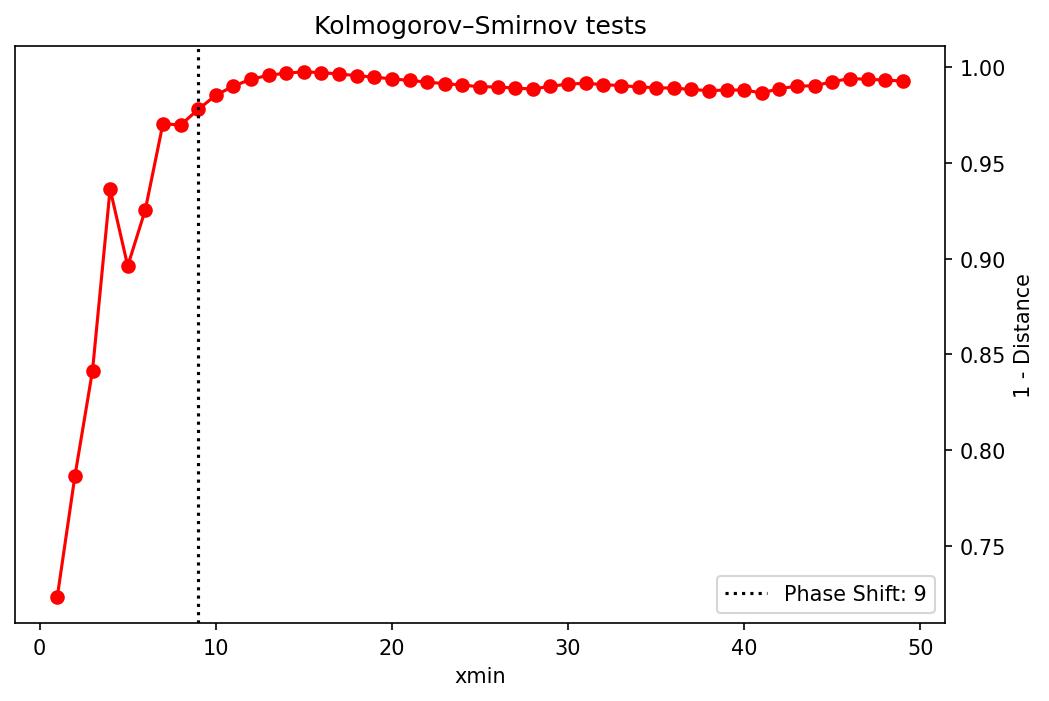

In [76]:
fig, ax2 = plt.subplots(nrows=1,ncols=1,dpi=150,figsize=(8,5))

ax2.scatter(xmins,1-ks_dist,color='red')
ax2.plot(xmins,1-ks_dist,color='red')
ax2.axvline(9,color='k',linestyle='dotted',label='Phase Shift: '+str(9))
ax2.set_xlabel('xmin')
ax2.set_ylabel('1 - Distance')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.legend()
ax2.set_title('Kolmogorov–Smirnov tests')
plt.show

In [79]:
df=pd.read_csv('/home/lpsha/s154446/walkability/data/interim/copenhagen/network_features.csv')

In [6]:
degree=df['merged_degree10'].values

In [91]:
df.loc[df['merged_degree10']<9]['merged_mm_len10'].mean()

224.54611080186172

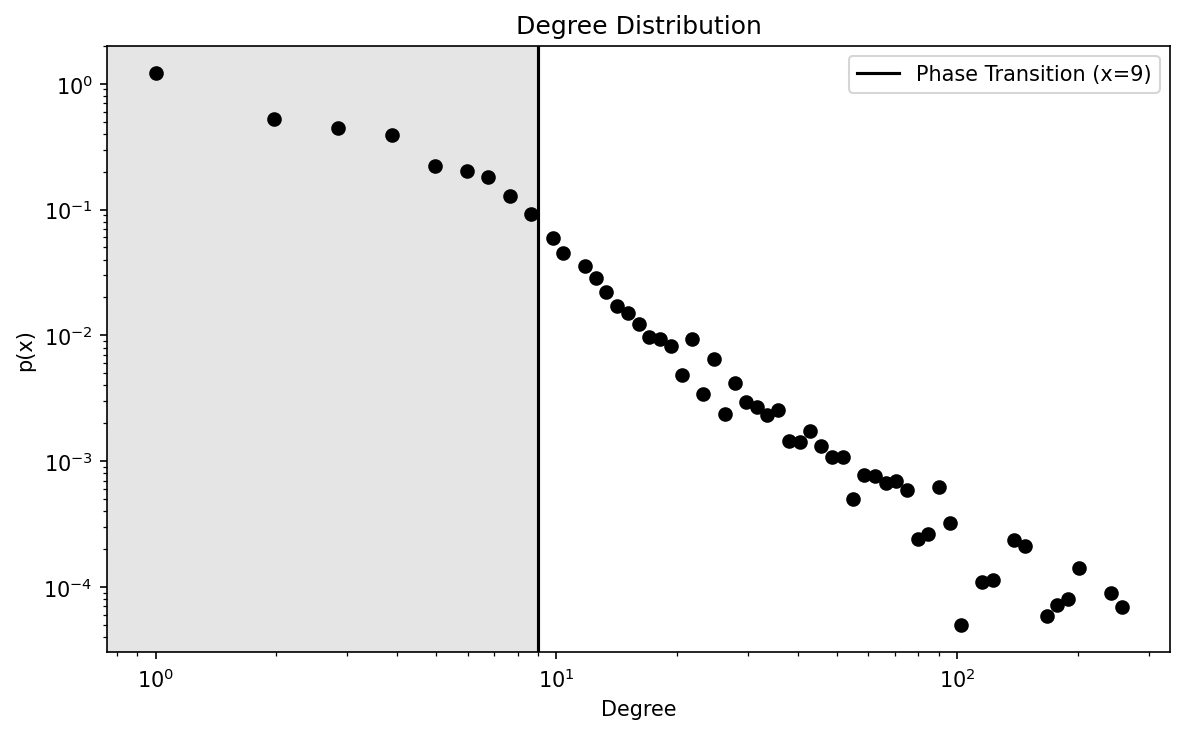

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5),dpi=150)

# Histogram data
degree = df['merged_degree10'].values
y, x = np.histogram(degree, bins=np.logspace(0, np.log10(degree.max()), len(np.unique(degree))), density=True)
x = x[:-1]
x_nn = x[y != 0][:-1]
y_nn = y[y != 0][:-1]
ax.scatter(x_nn, y_nn, alpha=1, zorder=2, color='k', label='Street Network')

# Add vertical line at x=7
ax.axvline(9, color='k', label='Phase Transition (x=9)')

# Add gray background to the left of x=7
ax.axvspan(0, 9, color='gray', alpha=0.2, zorder=1, label='Phase Shift Region')

# Log-log scaling and labels
ax.set_ylabel('p(x)')
ax.set_xlabel('Degree')
ax.set_xscale('log')
ax.set_yscale('log')

# Add legend
legend_elements = [
    ax.lines[0],  # Use the axvline's line as the legend entry
]
ax.legend(handles=legend_elements, loc='upper right')

plt.title("Degree Distribution")
plt.tight_layout()
plt.show()
